# Marketing Spend Analysis – EDA & Baseline Model

## Objective
Understand how different marketing channels impact sales and establish a baseline
model before applying preprocessing and optimization.


In [2]:
import pandas as pd

df = pd.read_csv("../data/media_spend.csv")
df.head()


,Division,Calendar_Week,Paid_Views,Organic_Views,Google_Impressions,Email_Impressions,Facebook_Impressions,Affiliate_Impressions,Overall_Views,Sales
0,A,1/6/2018,392,422,408,349895.0107,73580,12072,682,59417
1,A,1/13/2018,787,904,110,506270.2176,11804,9499,853,56806
2,A,1/20/2018,81,970,742,430042.1538,52232,17048,759,48715
3,A,1/27/2018,25,575,65,417745.6658,78640,10207,942,72047
4,A,2/3/2018,565,284,295,408505.8012,40561,5834,658,56235


In [3]:
df.columns


Index(['Division', 'Calendar_Week', 'Paid_Views', 'Organic_Views',
       'Google_Impressions', 'Email_Impressions', 'Facebook_Impressions',
       'Affiliate_Impressions', 'Overall_Views', 'Sales'],
      dtype='object')

In [4]:
df.shape


(3051, 10)

In [5]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3051 entries, 0 to 3050
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Division               3051 non-null   object 
 1   Calendar_Week          3051 non-null   object 
 2   Paid_Views             3051 non-null   int64  
 3   Organic_Views          3051 non-null   int64  
 4   Google_Impressions     3051 non-null   int64  
 5   Email_Impressions      3051 non-null   float64
 6   Facebook_Impressions   3051 non-null   int64  
 7   Affiliate_Impressions  3051 non-null   int64  
 8   Overall_Views          3051 non-null   int64  
 9   Sales                  3051 non-null   int64  
dtypes: float64(1), int64(7), object(2)
memory usage: 238.5+ KB


## Business Understanding

The objective is to understand how different marketing channels impact sales.
We treat sales as the business outcome, and marketing impressions/views as drivers.


In [6]:
target = "Sales"


In [7]:
features = [
    "Paid_Views",
    "Organic_Views",
    "Google_Impressions",
    "Email_Impressions",
    "Facebook_Impressions",
    "Affiliate_Impressions"
]


In [8]:
df[features + [target]].describe()


,Paid_Views,Organic_Views,Google_Impressions,Email_Impressions,Facebook_Impressions,Affiliate_Impressions,Sales
count,3051.000000,3051.000000,3.051000e+03,3.051000e+03,3.051000e+03,3051.000000,3.051000e+03
mean,15093.941658,13355.673222,8.861738e+05,7.605094e+05,2.691269e+05,22910.902655,1.859014e+05
std,30785.884979,24079.399689,1.355076e+06,6.260141e+05,4.665117e+05,21617.637497,2.322079e+05
min,1.000000,1.000000,7.000000e+00,4.089445e+04,2.900000e+01,910.000000,1.543600e+04
25%,537.000000,712.500000,1.698280e+05,3.784969e+05,5.707350e+04,9127.000000,7.339350e+04
50%,2699.000000,4110.000000,4.905310e+05,5.909708e+05,1.275230e+05,16658.000000,1.135730e+05
75%,17358.000000,16230.500000,1.022622e+06,9.622466e+05,2.835050e+05,27486.500000,2.029755e+05
max,518190.000000,270453.000000,1.715044e+07,7.317730e+06,7.558435e+06,175791.000000,3.575430e+06


In [9]:
df[features + [target]].head()


,Paid_Views,Organic_Views,Google_Impressions,Email_Impressions,Facebook_Impressions,Affiliate_Impressions,Sales
0,392,422,408,349895.0107,73580,12072,59417
1,787,904,110,506270.2176,11804,9499,56806
2,81,970,742,430042.1538,52232,17048,48715
3,25,575,65,417745.6658,78640,10207,72047
4,565,284,295,408505.8012,40561,5834,56235


In [10]:
df[features + [target]].corr()[target].sort_values(ascending=False)


Sales                    1.000000
Google_Impressions       0.783338
Facebook_Impressions     0.749133
Email_Impressions        0.746729
Affiliate_Impressions    0.440282
Organic_Views            0.390960
Paid_Views               0.289688
Name: Sales, dtype: float64

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt


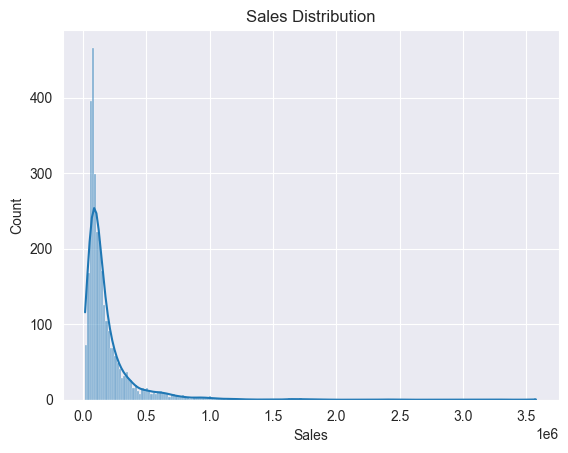

In [12]:
sns.histplot(df[target], kde=True)
plt.title("Sales Distribution")
plt.show()


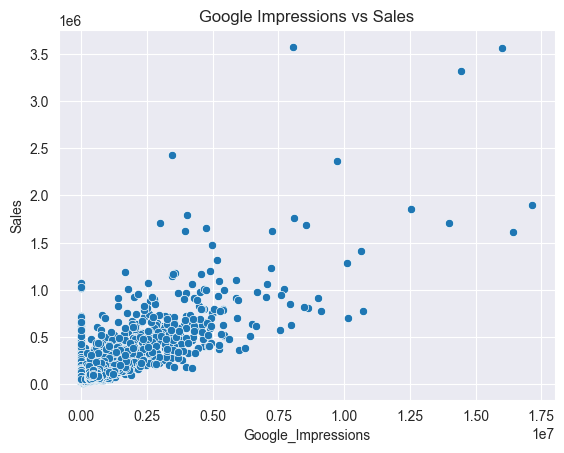

In [13]:
sns.scatterplot(
    x=df["Google_Impressions"],
    y=df["Sales"]
)
plt.title("Google Impressions vs Sales")
plt.show()


In [14]:
df["Calendar_Week"] = pd.to_datetime(df["Calendar_Week"])


In [15]:
df[features].describe(percentiles=[0.01, 0.99])


,Paid_Views,Organic_Views,Google_Impressions,Email_Impressions,Facebook_Impressions,Affiliate_Impressions
count,3051.000000,3051.000000,3.051000e+03,3.051000e+03,3.051000e+03,3051.000000
mean,15093.941658,13355.673222,8.861738e+05,7.605094e+05,2.691269e+05,22910.902655
std,30785.884979,24079.399689,1.355076e+06,6.260141e+05,4.665117e+05,21617.637497
min,1.000000,1.000000,7.000000e+00,4.089445e+04,2.900000e+01,910.000000
1%,27.000000,28.000000,6.600000e+01,6.938780e+04,2.297500e+03,1658.000000
50%,2699.000000,4110.000000,4.905310e+05,5.909708e+05,1.275230e+05,16658.000000
99%,153453.500000,120924.000000,6.315524e+06,3.143278e+06,2.205526e+06,111630.500000
max,518190.000000,270453.000000,1.715044e+07,7.317730e+06,7.558435e+06,175791.000000


## Model 1: Baseline Linear Regression
Purpose: Establish a reference performance without preprocessing.

In [16]:
# Feature matrix and target vector
X = df[features]
y = df[target]



In [17]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [18]:
from sklearn.linear_model import LinearRegression

baseline_lr = LinearRegression()
baseline_lr.fit(X_train, y_train)


,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [20]:
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

y_pred_baseline = baseline_lr.predict(X_test)

baseline_r2 = r2_score(y_test, y_pred_baseline)
baseline_rmse = np.sqrt(mean_squared_error(y_test, y_pred_baseline))

baseline_r2, baseline_rmse


(0.6423394702880223, np.float64(114758.27314510015))

In [21]:
pd.DataFrame({
    "Channel": features,
    "Coefficient": baseline_lr.coef_
}).sort_values(by="Coefficient", ascending=False)


,Channel,Coefficient
1,Organic_Views,0.401565
4,Facebook_Impressions,0.198052
3,Email_Impressions,0.169321
2,Google_Impressions,0.043952
0,Paid_Views,-0.339861
5,Affiliate_Impressions,-0.733358


In [23]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd

X_vif = df[features]

vif_data = pd.DataFrame({
    "Feature": X_vif.columns,
    "VIF": [
        variance_inflation_factor(X_vif.values, i)
        for i in range(X_vif.shape[1])
    ]
})

vif_data


,Feature,VIF
0,Paid_Views,3.463971
1,Organic_Views,4.026058
2,Google_Impressions,3.956877
3,Email_Impressions,6.392083
4,Facebook_Impressions,2.940434
5,Affiliate_Impressions,4.139994


## Multicollinearity Assessment (VIF)

Variance Inflation Factor (VIF) was used to assess multicollinearity among the marketing channel features.

- All features have VIF values below the commonly accepted threshold of 10.
- Email_Impressions shows moderate multicollinearity but remains within acceptable limits.
- No severe multicollinearity issues were detected.

**Decision:**
All marketing channels were retained to preserve interpretability and ensure that individual channel impacts on sales can be clearly explained to business stakeholders.


In [24]:
import numpy as np

df["log_Sales"] = np.log1p(df["Sales"])


In [25]:
y_log = df["log_Sales"]


In [26]:
X_train_log, X_test_log, y_train_log, y_test_log = train_test_split(
    X, y_log, test_size=0.2, random_state=42
)


## Model 2: Linear Regression with Log-Transformed Sales
Purpose: Address skewness in sales distribution and improve model stability.


In [27]:
log_lr = LinearRegression()
log_lr.fit(X_train_log, y_train_log)


,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [28]:
y_pred_log = log_lr.predict(X_test_log)

log_r2 = r2_score(y_test_log, y_pred_log)
log_rmse = np.sqrt(mean_squared_error(y_test_log, y_pred_log))

log_r2, log_rmse


(0.6302365054317794, np.float64(0.48179501317105433))

## Model Selection Decision

Both baseline and log-transformed linear regression models achieved comparable R² values.
However, the baseline model exhibited very large absolute errors due to skewness and outliers
in the Sales distribution.

The log-transformed model was selected as the final model because:
- It stabilizes variance and reduces the impact of extreme sales values
- It provides more reliable predictions for scenario simulation
- It is better suited for decision analytics and optimization use cases

This trade-off prioritizes robustness and interpretability over marginal differences in R².


In [30]:
import joblib

joblib.dump(log_lr, "../models/final_log_linear_model.pkl")


['../models/final_log_linear_model.pkl']

In [31]:
joblib.dump(features, "../models/model_features.pkl")


['../models/model_features.pkl']